In [1]:
install.packages("matlib")
install.packages("rsample")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘rgl’, ‘car’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’




In [2]:
 library(matlib)
 library(ggplot2)
 library(rsample)

In [3]:
data <- read.csv("dataset.csv")

In [4]:
X <- as.matrix(data[, c("x1", "x3", "x4", "x5")])

In [5]:
head(X)

x1,x3,x4,x5
8.34,40.77,1010.84,90.01
23.64,58.49,1011.40,74.20
29.74,56.90,1007.15,41.91
19.07,49.69,1007.22,76.79
11.80,40.66,1017.13,97.20
13.97,39.16,1016.05,84.60


In [6]:
Y <- as.matrix(data[, c("x2")])

In [7]:
head(Y)

480.48
445.75
438.76
453.09
464.43
470.96


In [8]:
time <- as.matrix(data[, c("t")])

In [9]:
head(time)

1
2
3
4
5
6


# 1.1

In [10]:
X.ts<-ts(X,start = c(min(time),max(time)),frequency =1)
Y.ts<-ts(Y,start = c(min(time),max(time)),frequency =1)

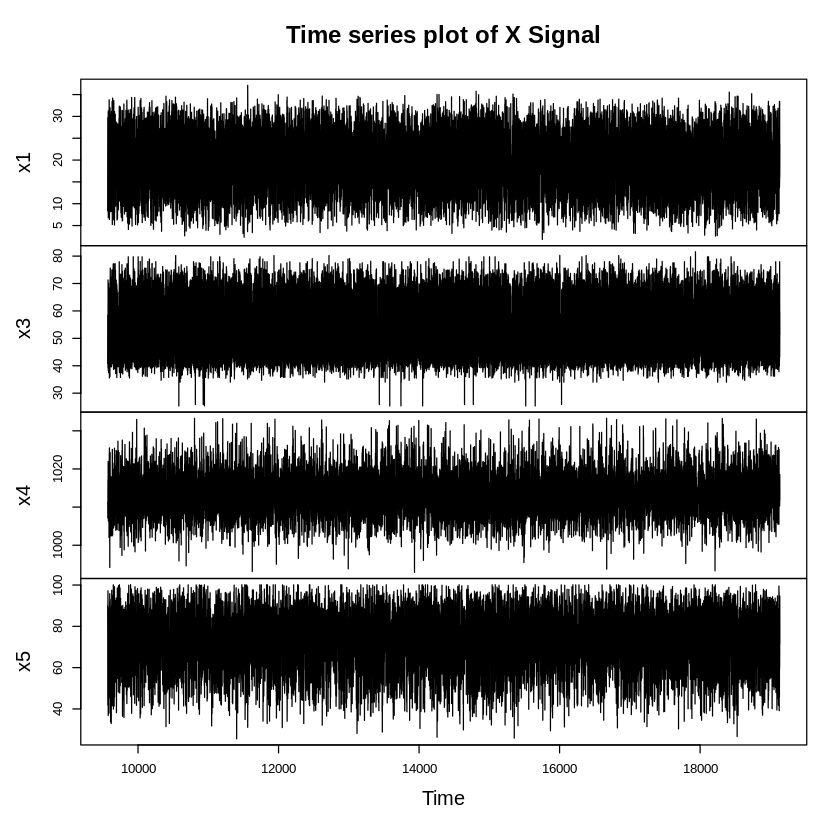

In [11]:
plot(X.ts,main = "Time series plot of X Signal", xlab = "Time", ylab = "Input signal")

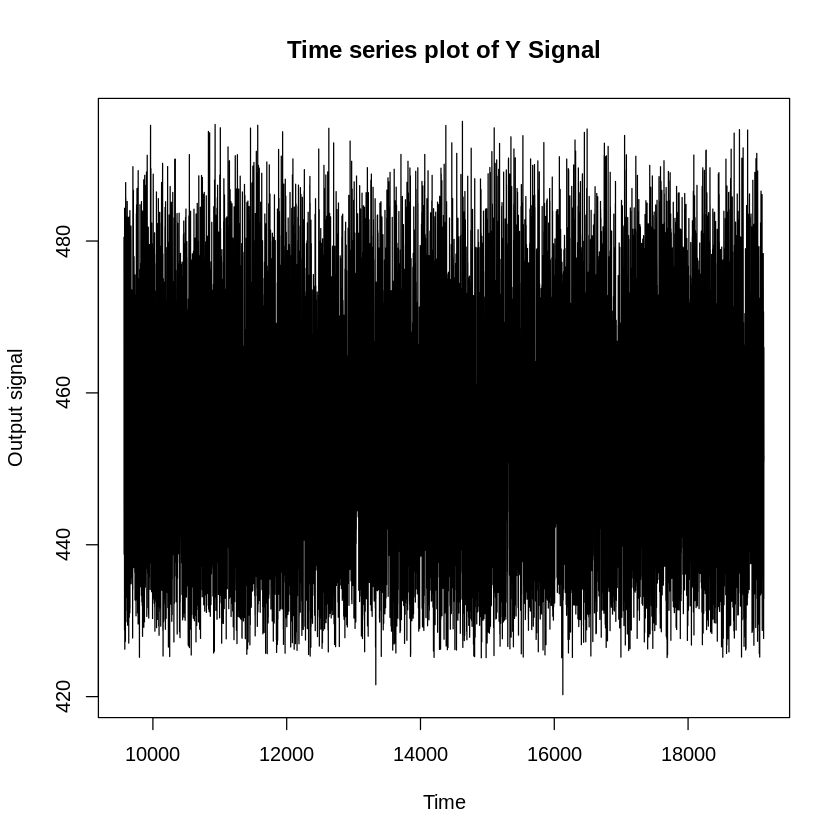

In [12]:
plot(Y.ts,main = "Time series plot of Y Signal", xlab = "Time", ylab = "Output signal")

# 1.2

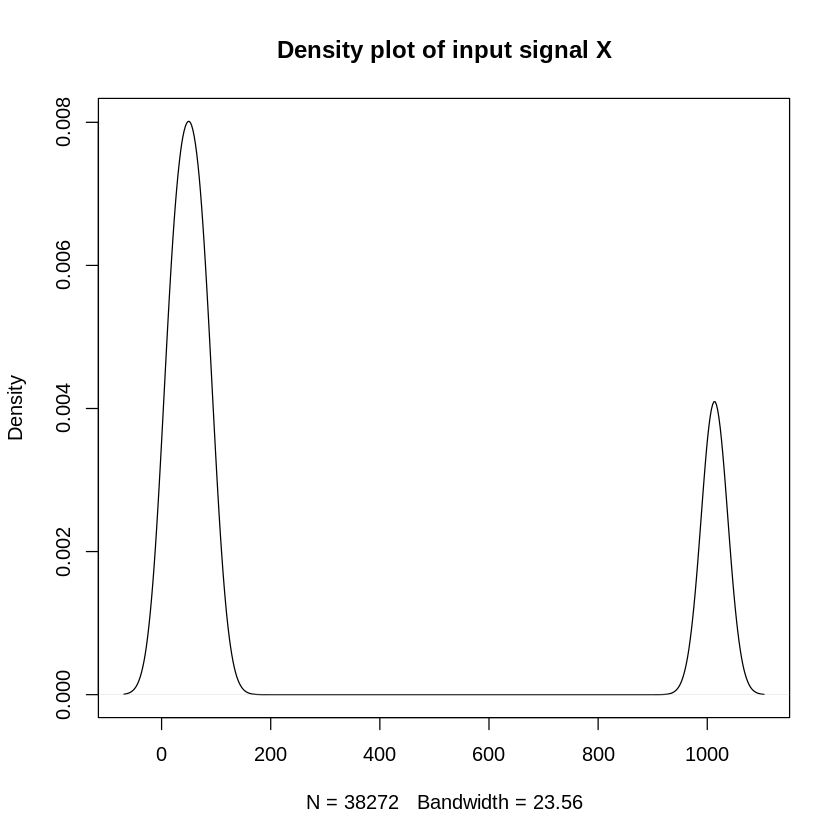

In [13]:
density_of_X=density(X)
plot(density_of_X,main = "Density plot of input signal X")

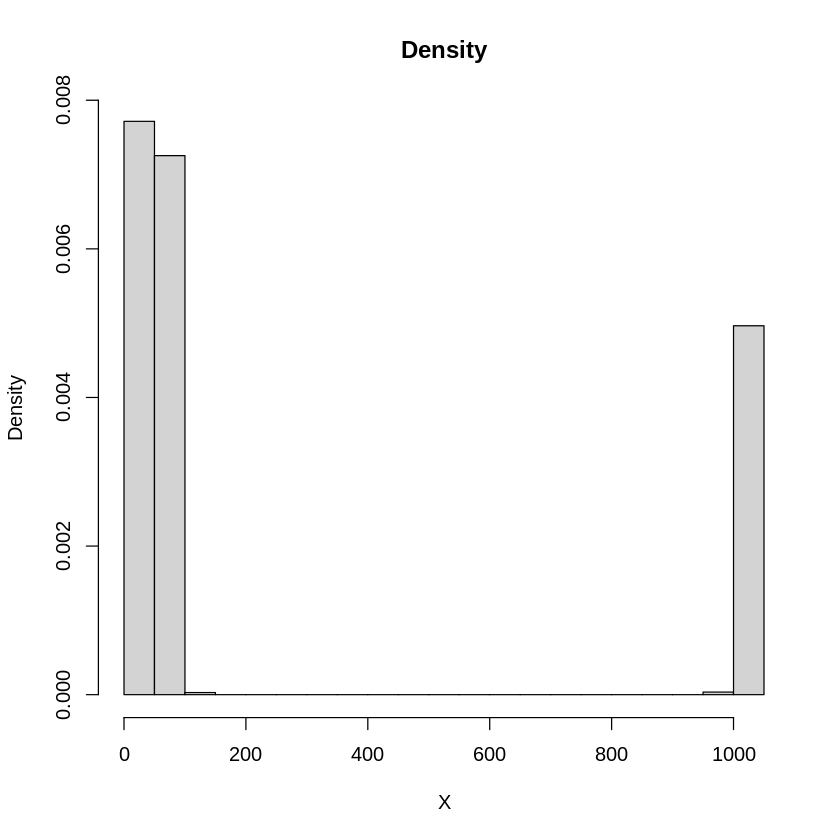

In [14]:
hist(X,freq = FALSE,main = "Density")

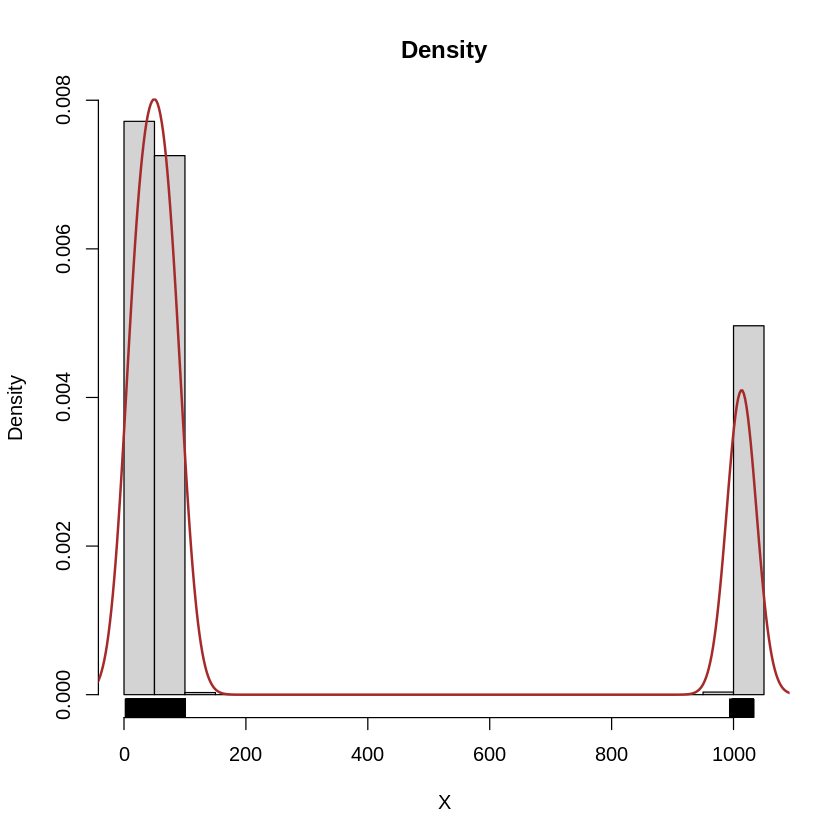

In [15]:
hist(X,freq = FALSE,main = "Density")
lines(density_of_X,lwd=2,col="brown")
rug(jitter(X))

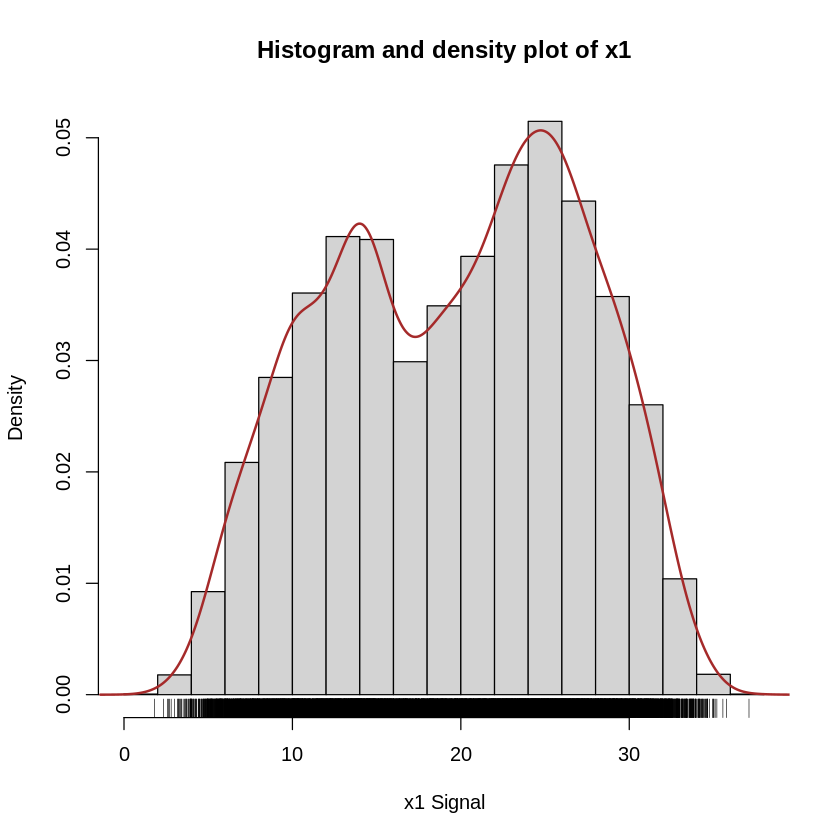

In [16]:
#Creating a density plot of input signal X1
density_of_X1=density(X[,"x1"])
hist(X[,"x1"],freq = FALSE,main = "Histogram and density plot of x1",xlab = "x1 Signal")
lines(density_of_X1,lwd=2,col="brown")
# Add the data-points with noise in the X-axis
rug(jitter(X[,"x1"]))



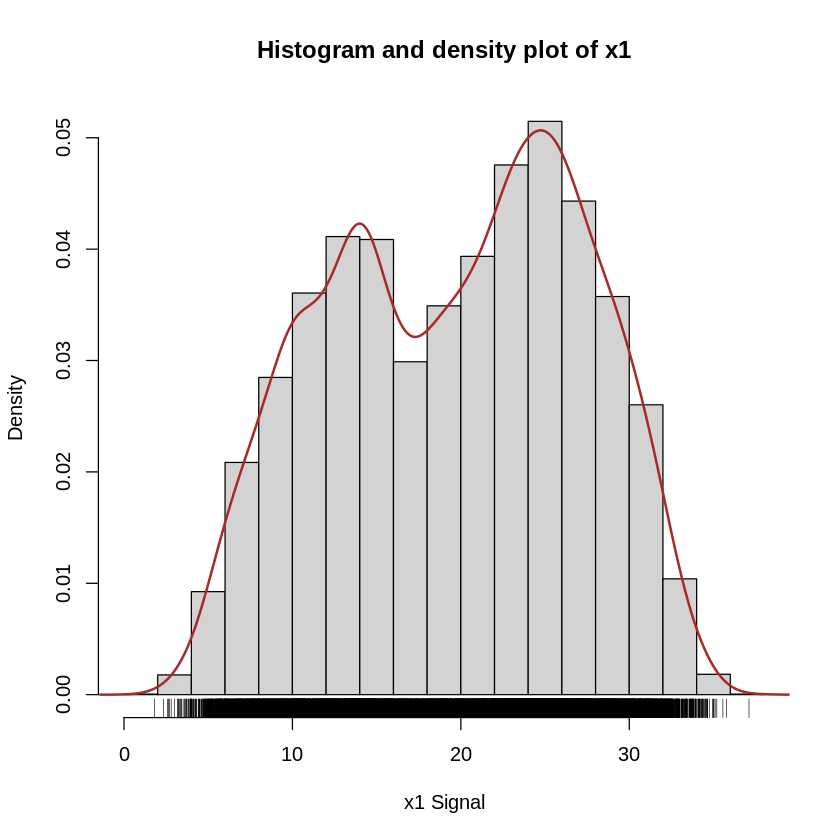

In [17]:
#Creating a density plot of input signal X1
density_of_X1=density(X[,"x1"])
hist(X[,"x1"],freq = FALSE,main = "Histogram and density plot of x1",xlab = "x1 Signal")
lines(density_of_X1,lwd=2,col="brown")
# Add the data-points with noise in the X-axis
rug(jitter(X[,"x1"]))

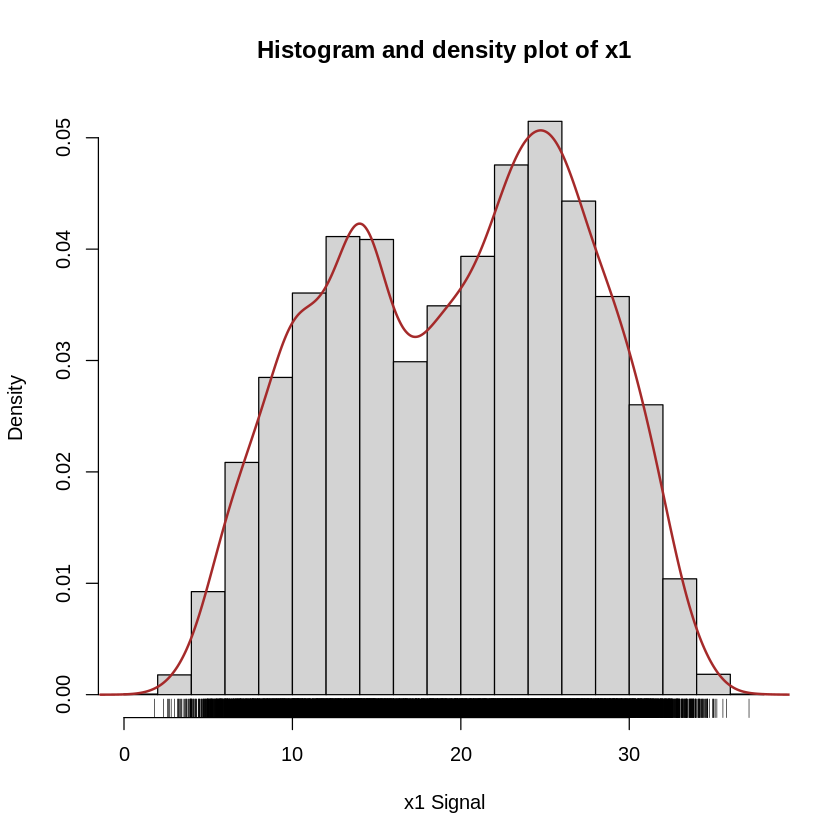

In [18]:
#Creating a density plot of input signal X1
density_of_X1=density(X[,"x1"])
hist(X[,"x1"],freq = FALSE,main = "Histogram and density plot of x1",xlab = "x1 Signal")
lines(density_of_X1,lwd=2,col="brown")
# Add the data-points with noise in the X-axis
rug(jitter(X[,"x1"]))

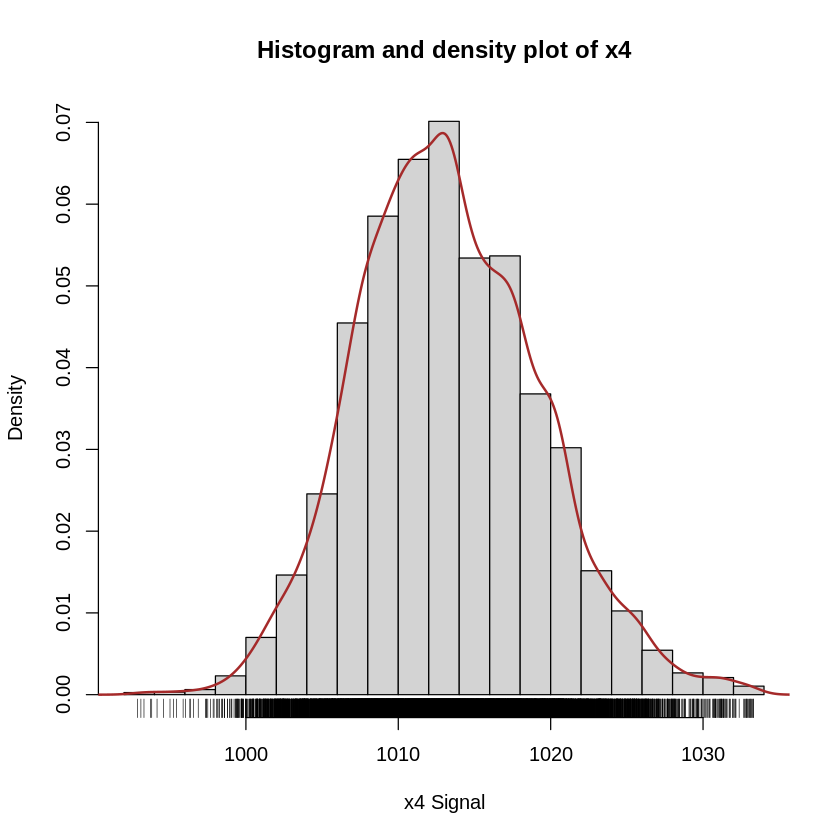

In [19]:
density_of_X4=density(X[,"x4"])
hist(X[,"x4"],freq = FALSE,main = "Histogram and density plot of x4",xlab = "x4 Signal")
lines(density_of_X4,lwd=2,col="brown")
# Add the data-points with noise in the X-axis
rug(jitter(X[,"x4"]))


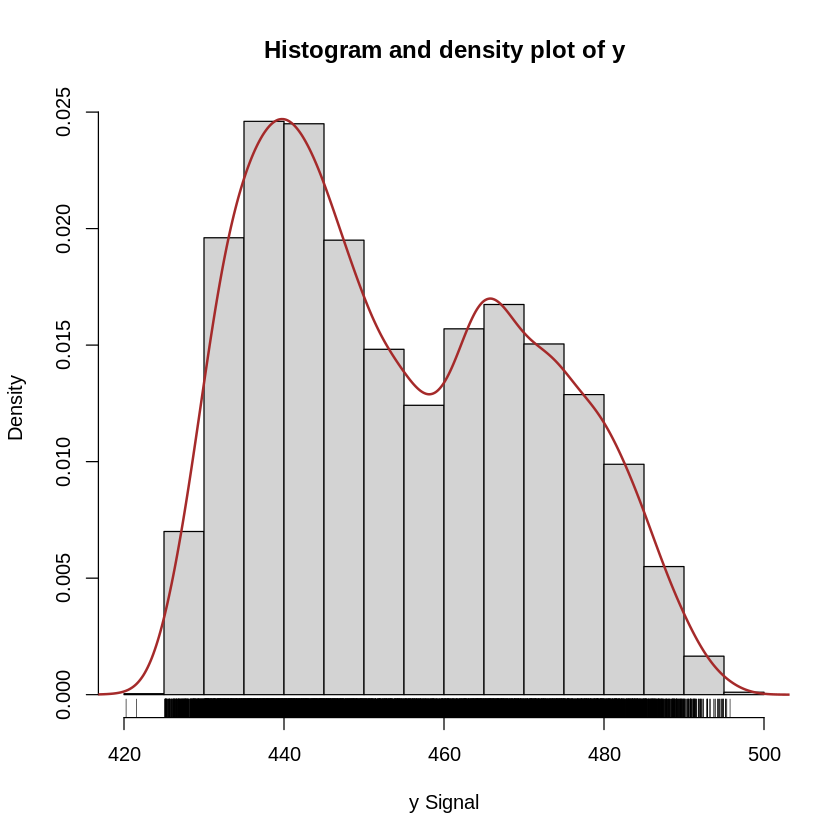

In [21]:
#Creating a density plot of output signal Y
# density_of_y=density(Y[,"y"]) # This line caused the error
density_of_y=density(Y) # Access the data in Y directly
hist(Y,freq = FALSE,main = "Histogram and density plot of y",xlab = "y Signal")
lines(density_of_y,lwd=2,col="brown")
# Add the data-points with noise in the X-axis
rug(jitter(Y))

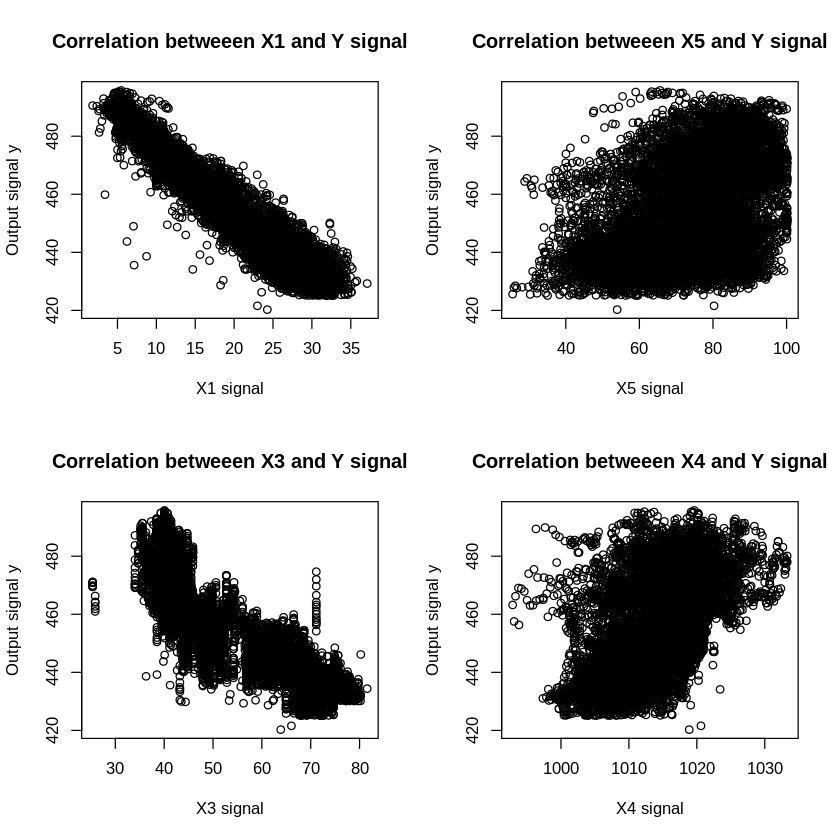

In [22]:
par(mfrow=c(2,2))

# Plotting input signal X1 against output signal Y
plot(X[,"x1"],Y,main = "Correlation betweeen X1 and Y signal", xlab = "X1 signal", ylab = "Output signal y")

# Plotting input signal X2 against output signal Y
plot(X[,"x5"],Y,main = "Correlation betweeen X5 and Y signal", xlab = "X5 signal", ylab = "Output signal y")

# Plotting input signal X3 against output signal Y
plot(X[,"x3"],Y,main = "Correlation betweeen X3 and Y signal", xlab = "X3 signal", ylab = "Output signal y")

# Plotting input signal X4 against output signal Y
plot(X[,"x4"],Y,main = "Correlation betweeen X4 and Y signal", xlab = "X4 signal", ylab = "Output signal y")

2.1

In [24]:
# Calculating ones for binding the data
ones = matrix(1 , length(X)/4,1)
head(ones)

1
1
1
1
1
1


In [25]:
#Binding data from equation of model 1.
X_model1<-cbind(ones,X[,"x4"], X[,"x3"]^2)
head(X_model1)

1,1010.84,1662.193
1,1011.40,3421.080
1,1007.15,3237.610
1,1007.22,2469.096
1,1017.13,1653.236
1,1016.05,1533.506


In [26]:
#Calculating thetahat of Model 1
Model1_thetahat=solve(t(X_model1) %*% X_model1) %*% t(X_model1) %*% Y
Model1_thetahat

-87.908121029
0.563798669
-0.009323296


In [27]:
#For model 2
#Binding data from equation of model 2.
X_model2<-cbind(ones,X[,"x4"],X[,"x3"]^2,X[,"x5"])
head(X_model2)

1,1010.84,1662.193,90.01
1,1011.40,3421.080,74.20
1,1007.15,3237.610,41.91
1,1007.22,2469.096,76.79
1,1017.13,1653.236,97.20
1,1016.05,1533.506,84.60


In [28]:
#Calculating thetahat of Model 2
Model2_thetahat=solve(t(X_model2) %*% X_model2) %*% t(X_model2) %*% Y
Model2_thetahat

-1.167110e+02
5.780068e-01
-8.755329e-03
1.724164e-01


In [29]:
#Model 3
#Binding data from equation of model 3.
X_model3<-cbind(X[,"x3"],X[,"x4"],X[,"x5"]^3)
head(X_model3)

40.77,1010.84,729243.03
58.49,1011.40,408518.49
56.90,1007.15,73612.74
49.69,1007.22,452807.91
40.66,1017.13,918330.05
39.16,1016.05,605495.74


In [30]:
#Calculating thetahat of Model 3
Model3_thetahat=solve(t(X_model3) %*% X_model3) %*% t(X_model3) %*% Y
Model3_thetahat

-1.017017e+00
4.986006e-01
9.978123e-06


In [31]:
#For model 4
#Binding data from equation of model 4.
X_model4<-cbind(ones,X[,"x4"],(X[,"x3"])^2,(X[,"x5"])^3)
head(X_model4)

1,1010.84,1662.193,729243.03
1,1011.40,3421.080,408518.49
1,1007.15,3237.610,73612.74
1,1007.22,2469.096,452807.91
1,1017.13,1653.236,918330.05
1,1016.05,1533.506,605495.74


In [32]:
#Calculating thetahat of Model 4
Model4_thetahat=Ginv(t(X_model4) %*% X_model4) %*% t(X_model4) %*% Y
Model4_thetahat

-7.630074e+03
5.955655e+01
1.423217e+01
-4.347364e-02


In [33]:
# for Model 5
#Binding data from equation of model 5.
X_model5<-cbind(ones,(X[,"x4"]),(X[,"x1"])^2,(X[,"x3"])^2)
head(X_model5)

1,1010.84,69.5556,1662.193
1,1011.40,558.8496,3421.080
1,1007.15,884.4676,3237.610
1,1007.22,363.6649,2469.096
1,1017.13,139.2400,1653.236
1,1016.05,195.1609,1533.506


In [34]:
#Calculating thetahat of model 1
Model5_thetahat=solve(t(X_model5) %*% X_model5) %*% t(X_model5) %*% Y
Model5_thetahat

251.671653074
0.227168908
-0.036521863
-0.003650664


In [35]:
#model1
Model1_thetahat
t(Model1_thetahat)

-87.908121029
0.563798669
-0.009323296


-87.90812,0.5637987,-0.009323296


In [36]:
#model 2
Model2_thetahat
t(Model2_thetahat)

-1.167110e+02
5.780068e-01
-8.755329e-03
1.724164e-01


-116.711,0.5780068,-0.008755329,0.1724164


In [37]:
#model 3
Model3_thetahat
t(Model3_thetahat)

-1.017017e+00
4.986006e-01
9.978123e-06


-1.017017,0.4986006,9.978123e-06


In [38]:
#model 4
Model4_thetahat
t(Model4_thetahat)

-7.630074e+03
5.955655e+01
1.423217e+01
-4.347364e-02


-7630.074,59.55655,14.23217,-0.04347364


In [39]:
#model 5
Model5_thetahat
t(Model5_thetahat)

251.671653074
0.227168908
-0.036521863
-0.003650664


251.6717,0.2271689,-0.03652186,-0.003650664


Task 2.2
#Calculating Y-hat and RSS for each model

In [40]:
#Calculating Y-hat and RSS Model 1
Y_hat_model1 = X_model1 %*% Model1_thetahat
head(Y_hat_model1)

#Calculating RSS
RSS_Model_1=sum((Y-Y_hat_model1)^2)
head(RSS_Model_1)

466.5050
450.4221
449.7365
456.9411
470.1348
470.6422


[1] 657248.2

In [42]:
# Calculating Y-hat and RSS of model 2
Y_hat_model2 = X_model2 %*% Model2_thetahat
head(Y_hat_model2)

#Calculating RSS
RSS_Model_2=sum((Y-Y_hat_model2)^2)
head(RSS_Model_2)

468.5275
450.7257
444.3082
457.0911
473.4813
471.7329


[1] 602347.1

In [43]:
# Calculating Y-hat and RSS of model 3
Y_hat_model3 = X_model3 %*% Model3_thetahat
head(Y_hat_model3)

#Calculating RSS
RSS_Model_3=sum((Y-Y_hat_model3)^2)
head(RSS_Model_3)

469.8181
448.8755
445.0318
456.1831
474.9529
472.8184


[1] 549034.9

In [44]:
# Calculating Y-hat and RSS of model 4
Y_hat_model4 = X_model4 %*% Model4_thetahat
head(Y_hat_model4)

#Calculating RSS
RSS_Model_4=sum((Y-Y_hat_model4)^2)
head(RSS_Model_4)

44525.83
83535.03
95230.31
67811.86
36552.66
48384.37


[1] 6.330284e+13

In [45]:
# Calculating Y-hat and RSS of model 5
Y_hat_model5 = X_model5 %*% Model5_thetahat
head(Y_hat_model5)

#Calculating RSS
RSS_Model_5=sum((Y-Y_hat_model5)^2)
head(RSS_Model_5)

472.6947
448.5308
436.3430
458.1852
471.6113
469.7607


[1] 365625

In [48]:
#printing RSS value
model1 <- c(RSS_Model_1)
model2 <- c(RSS_Model_2)
model3 <- c(RSS_Model_3)
model4 <- c(RSS_Model_4)
model5 <- c(RSS_Model_5)

dfRSS <- data.frame(model1, model2,model3,model4,model5)
dfRSS

model1,model2,model3,model4,model5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
657248.2,602347.1,549034.9,6.330284e+13,365625


In [ ]:
#Task 2.3 Calculating likelihood and Variance of each model

In [50]:
N=length(Y)

#Calculating the Variance of Model 1
Variance_model1=RSS_Model_1/(N-1)
Variance_model1

#Calculating the log-likelihood of Model 1
likehood_Model_1=
  -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model1))-(1/(2*Variance_model1))*RSS_Model_1
likehood_Model_1

[1] 68.69951

[1] -33810.99

In [51]:
#Calculating Variance and log-likelihood of Model 2
Variance_model2=RSS_Model_2/(N-1)
Variance_model2

likehood_Model_2=
  -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model2))-(1/(2*Variance_model2))*RSS_Model_2
likehood_Model_2

[1] 62.96091

[1] -33393.69

In [52]:
#Calculating Variance and log-likelihood of Model 3
Variance_model3=RSS_Model_3/(N-1)
Variance_model3

likehood_Model_3=
  -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model3))-(1/(2*Variance_model3))*RSS_Model_3
likehood_Model_3

[1] 57.38841

[1] -32950.35

In [53]:
#Calculating Variance and log-likelihood of Model 4
Variance_model4=RSS_Model_4/(N-1)
Variance_model4

likehood_Model_4=
  -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model4))-(1/(2*Variance_model4))*RSS_Model_4
likehood_Model_4

[1] 6616791198

[1] -121755.9

In [54]:
#Calculating Variance and log-likelihood of Model 5
Variance_model5=RSS_Model_5/(N-1)
Variance_model5

likehood_Model_5=
  -(N/2)*(log(2*pi))-(N/2)*(log(Variance_model5))-(1/(2*Variance_model5))*RSS_Model_5
likehood_Model_5

[1] 38.21731

[1] -31005.4

In [55]:
model1 <- c(Variance_model1)
model2 <- c(Variance_model2)
model3 <- c(Variance_model3)
model4 <- c(Variance_model4)
model5 <- c(Variance_model5)

dfVariance <- data.frame(model1, model2,model3,model4,model5)
dfVariance

model1,model2,model3,model4,model5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
68.69951,62.96091,57.38841,6616791198,38.21731


In [56]:
model1 <- c(likehood_Model_1)
model2 <- c(likehood_Model_2)
model3 <- c(likehood_Model_3)
model4 <- c(likehood_Model_4)
model5 <- c(likehood_Model_5)

dfLikelihood <- data.frame(model1, model2,model3,model4,model5)
dfLikelihood

model1,model2,model3,model4,model5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-33810.99,-33393.69,-32950.35,-121755.9,-31005.4


Task 2.4
Calculating AIC And BIC of each model

In [62]:
# Calculating AIC and BIC of model 1
K_model1<-length(Model1_thetahat)
K_model1

[1] 3

In [63]:
AIC_model1=2*K_model1-2*likehood_Model_1
AIC_model1

[1] 67627.98

In [64]:
BIC_model1=K_model1*log(N)-2*likehood_Model_1
BIC_model1

[1] 67649.48

In [65]:
## thetahat of model 2
K_model2<-length(Model2_thetahat)
K_model2

[1] 4

In [66]:
##Calculating AIC and BIC of model 2
AIC_model2=2*K_model2-2*likehood_Model_2
AIC_model2

[1] 66795.38

In [67]:
BIC_model2=K_model2*log(N)-2*likehood_Model_2
BIC_model2

[1] 66824.05

In [68]:
## thetahat of model 3
K_model3<-length(Model3_thetahat)
K_model3

[1] 3

In [69]:
##Calculating AIC and BIC of model 3
AIC_model3=2*K_model3-2*likehood_Model_3
AIC_model3

[1] 65906.7

In [70]:
BIC_model3=K_model3*log(N)-2*likehood_Model_3
BIC_model3

[1] 65928.2

In [71]:
## thetahat of model 4
K_model4<-length(Model4_thetahat)
K_model4

[1] 4

In [72]:
##Calculating AIC and BIC of model 4
AIC_model4=2*K_model4-2*likehood_Model_4
AIC_model4

[1] 243519.8

In [73]:
BIC_model4=K_model4*log(N)-2*likehood_Model_4
BIC_model4

[1] 243548.5

In [74]:
## thetahat of model 5
K_model5<-length(Model5_thetahat)
K_model5

[1] 4

In [75]:
##Calculating AIC and BIC of model 5
AIC_model5=2*K_model5-2*likehood_Model_5
AIC_model5

[1] 62018.79

In [76]:
BIC_model5=K_model5*log(N)-2*likehood_Model_5
BIC_model5

[1] 62047.46

In [77]:
model1 <- c(K_model1)
model2 <- c(K_model2)
model3 <- c(K_model3)
model4 <- c(K_model4)
model5 <- c(K_model5)

dfK <- data.frame(model1, model2,model3,model4,model5)
dfK

model1,model2,model3,model4,model5
<int>,<int>,<int>,<int>,<int>
3,4,3,4,4


In [78]:
model1 <- c(AIC_model1)
model2 <- c(AIC_model2)
model3 <- c(AIC_model3)
model4 <- c(AIC_model4)
model5 <- c(AIC_model5)

dfAIC <- data.frame(model1, model2,model3,model4,model5)
dfAIC

model1,model2,model3,model4,model5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67627.98,66795.38,65906.7,243519.8,62018.79


In [79]:
model1 <- c(BIC_model1)
model2 <- c(BIC_model2)
model3 <- c(BIC_model3)
model4 <- c(BIC_model4)
model5 <- c(BIC_model5)

dfBIC <- data.frame(model1, model2,model3,model4,model5)
dfBIC

model1,model2,model3,model4,model5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67649.48,66824.05,65928.2,243548.5,62047.46


Task 2.5 calculating error plotting normal/gaussian distibution of each plot

In [80]:
par(mfrow=c(1,1))

## Error of model1
model1_error <- Y-Y_hat_model1
head(model1_error)

13.9749910
-4.6721095
-10.9765113
-3.8510601
-5.7048141
0.3178101


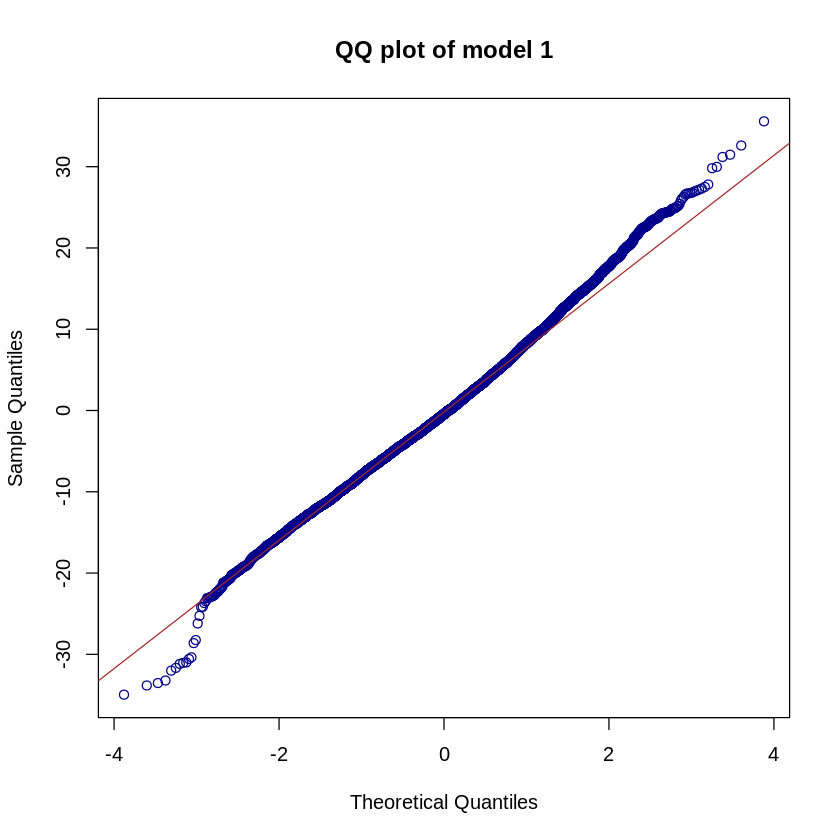

In [81]:
## Plotting the graph QQplot and QQ line of model 1
qqnorm(model1_error, col = "darkblue",main = "QQ plot of model 1")
qqline(model1_error, col = "brown",lwd=1)

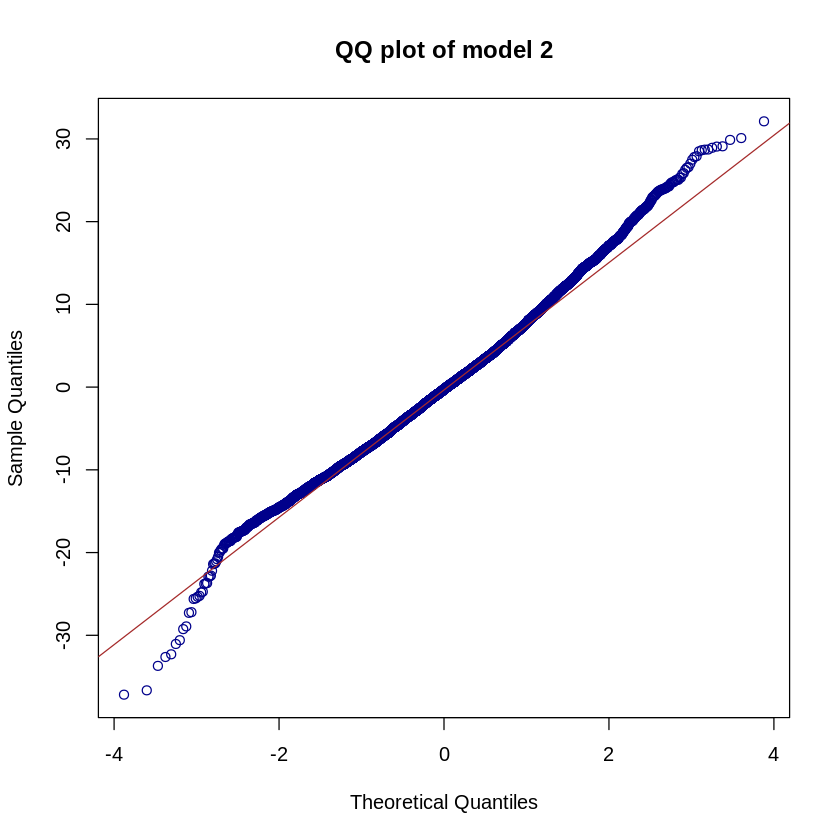

In [82]:
## Error of model2
model2_error <- Y-Y_hat_model2 # error of model 2
## Plotting QQplot and QQ line of model 2
qqnorm(model2_error, col = "darkblue",main = "QQ plot of model 2")
qqline(model2_error, col = "brown")

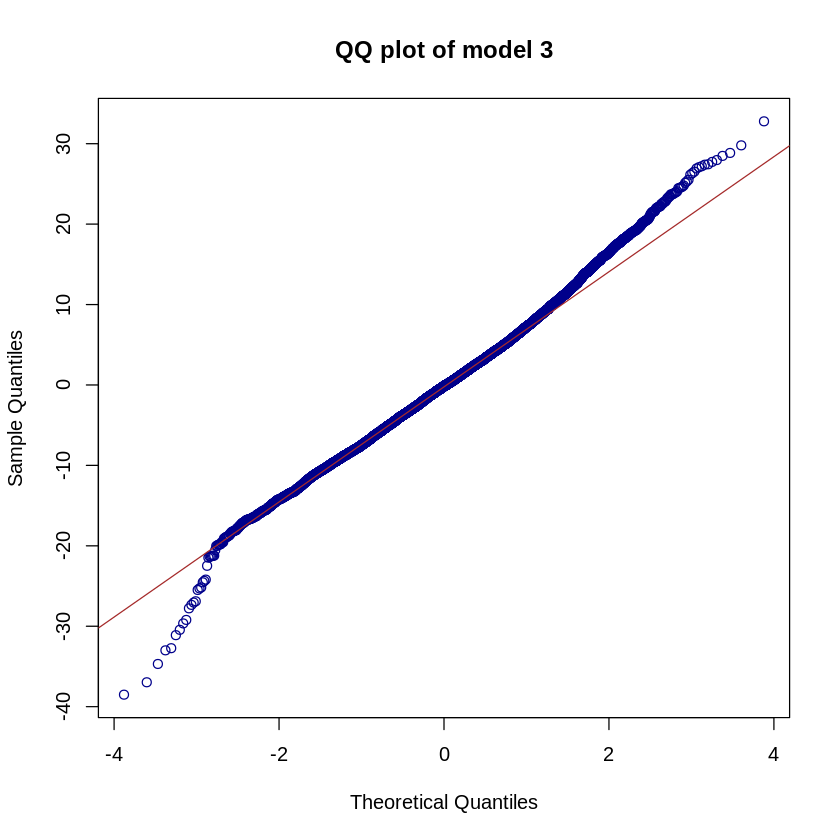

In [83]:
## Error of model3
model3_error <- Y- Y_hat_model3
## Plotting QQplot and QQ line of model 3
qqnorm(model3_error, col = "darkblue",main = "QQ plot of model 3")
qqline(model3_error, col = "brown")

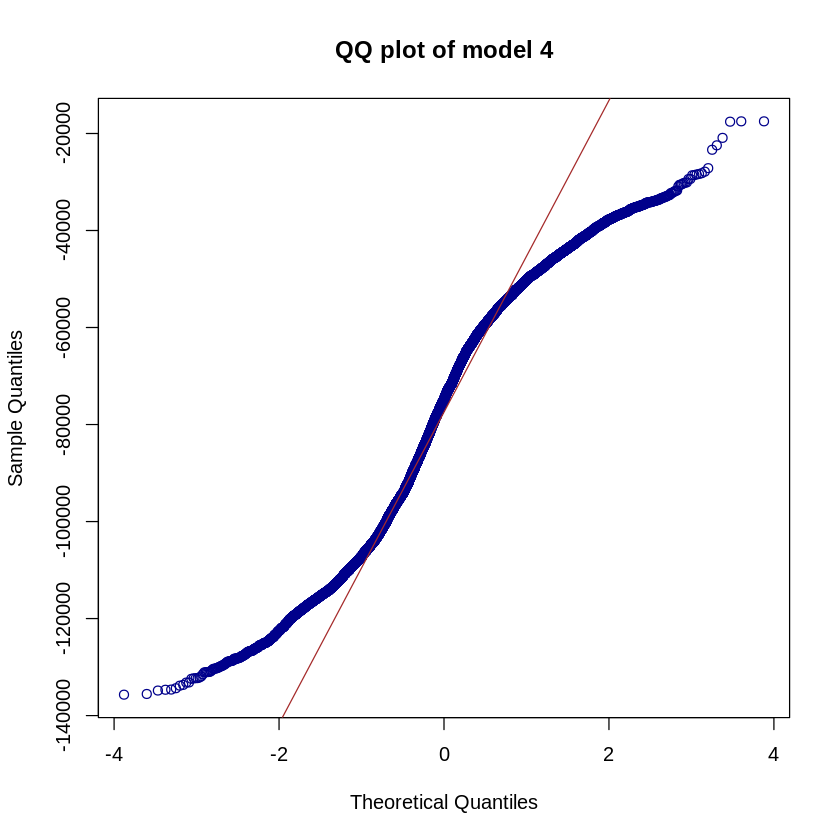

In [84]:
## Error of model4
model4_error <- Y-Y_hat_model4
## Plotting QQplot and QQ line of model 4
qqnorm(model4_error, col = "darkblue",main = "QQ plot of model 4")
qqline(model4_error, col = "brown")

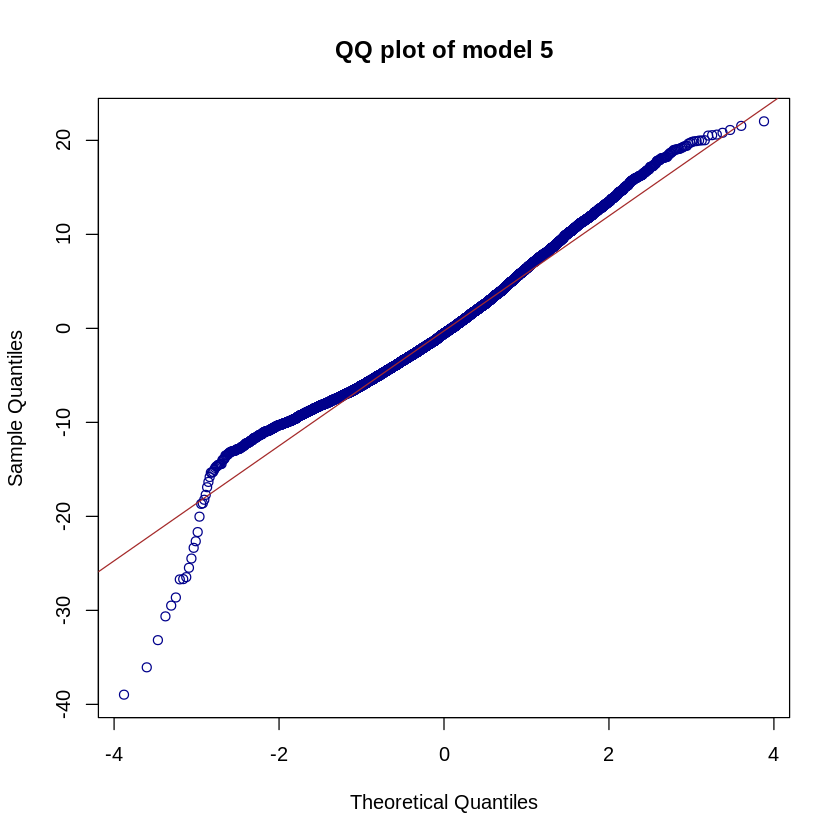

In [85]:
## Error of model5
model5_error <- Y- Y_hat_model5
## Plotting QQplot and QQ line of model 5
qqnorm(model5_error, col = "darkblue",main = "QQ plot of model 5")
qqline(model5_error, col = "brown")

Task 2.7 splitting data into training and testing dataset and calculating estamation based on training dataset
#also plotting normal distribution graph of training data

In [86]:
## Spliting the dataset y into  Traning and testing data set.
split_Y<-initial_split(data = as.data.frame(Y),prop=.7)
## Traning splitted Y dataset
Y_training_set<-training(split_Y)
Y_testing_set<-as.matrix(testing(split_Y))
## Testing splitted Y dataset
Y_training_data<-as.matrix(Y_training_set)

## Spliting the dataset of X into  Traning and testing data set.
split_X<-initial_split(data = as.data.frame(X),prop=.7)
## Traning splitted X dataset
X_training_set<-training(split_X)
## Testing splitted X dataset
X_testing_set<-as.matrix(testing(split_X))
X_testing_data<-as.matrix(X_testing_set)
X_training_data<-as.matrix(X_training_set)

### Estimating model parameters using Traning set
traning_ones=matrix(1 , length(X_training_set$x1),1)
# selected model 5 and using equation of model 5
X_traning_model<-cbind(traning_ones,X_training_set[,"x4"],(X_training_set[,"x1"])^2,(X_training_set[,"x3"])^2)
traning_thetahat=Ginv(t(X_traning_model) %*% X_traning_model) %*% t(X_traning_model) %*%  Y_training_data

### Model out/Prediction
Y_testing_hat = X_testing_data %*% traning_thetahat
head(Y_testing_hat)

V1
15705.80
21840.19
21060.07
23595.59
24053.70
15621.60


In [87]:
RSS_testing=sum((Y_testing_set-Y_testing_hat)^2)
head(RSS_testing)

[1] 1.156017e+12

In [88]:
t.test(Y_training_data, mu=500, alternative="two.sided", conf.level=0.95)


	One Sample t-test

data:  Y_training_data
t = -218.75, df = 6696, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 500
95 percent confidence interval:
 453.9503 454.7683
sample estimates:
mean of x 
 454.3593 


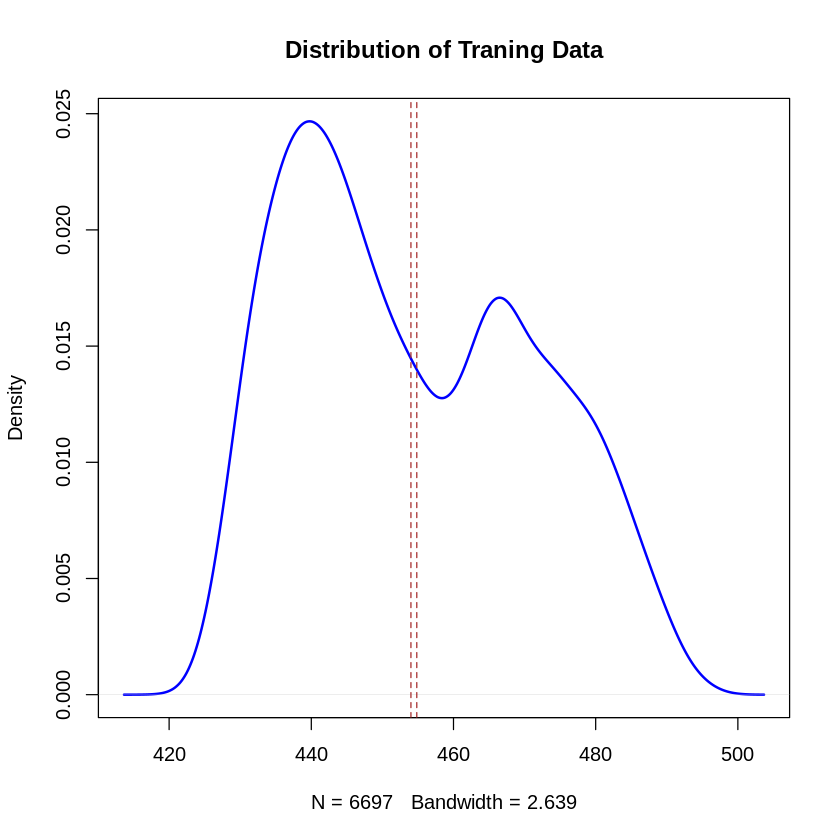

In [89]:
C_I1=454.0137
C_I2=454.8377
p2 <- plot(density(Y_training_data), col="blue", lwd=2,
           main="Distribution of Traning Data")
abline(v=C_I1,col="brown", lty=2)
abline(v=C_I2,col="brown", lty=2)

In [90]:
thetaHat_training =solve(t(X_training_data) %*% X_training_data) %*% t(X_training_data) %*%Y_training_data
head(thetaHat_training)

,V1
x1,0.29389829
x3,-0.05676321
x4,0.44347173
x5,0.03137475


In [91]:
length(thetaHat_training)

[1] 4

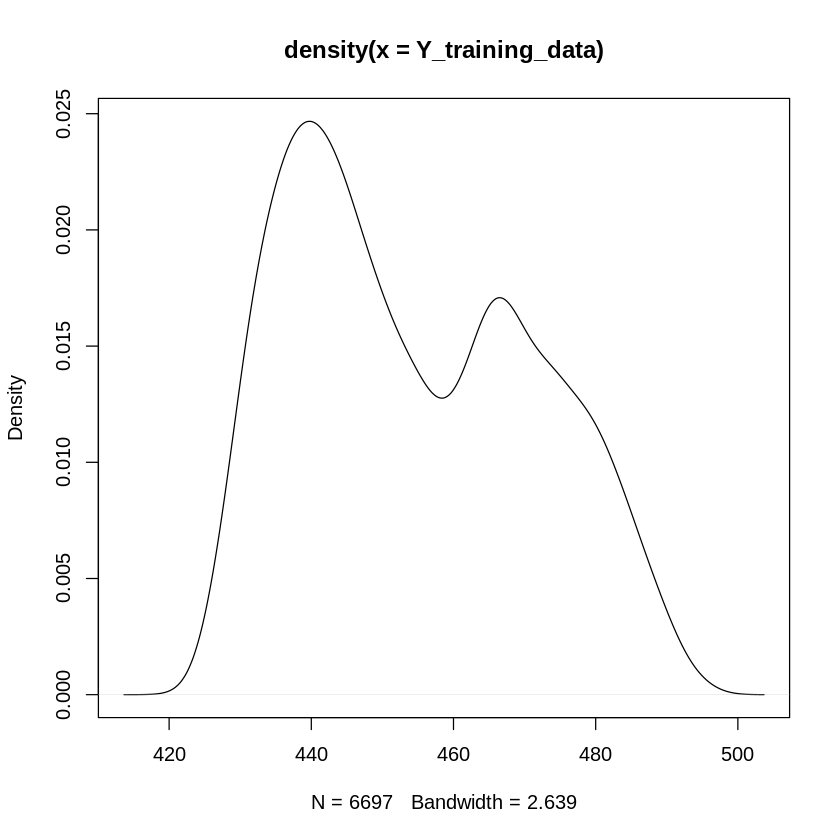

In [92]:
dis_test=density(Y_training_data)
plot((dis_test))

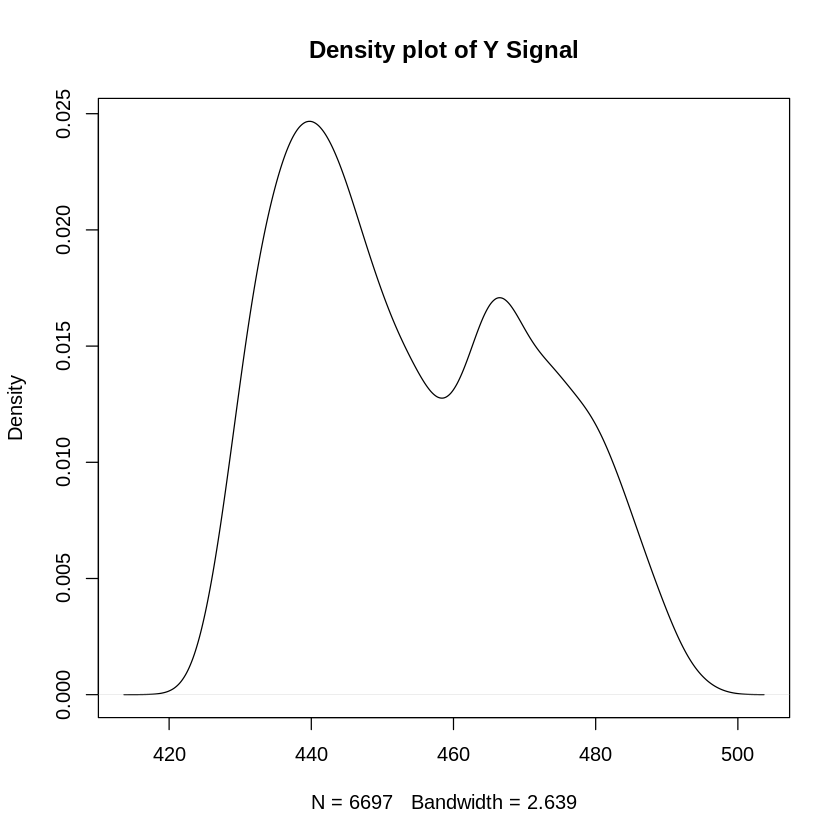

In [93]:
plot(dis_test,main = "Density plot of Y Signal")

In [94]:
### Calculating Confidential interval
z=1.96 ##(95%) Confidential interval
# error=((Y_testing_set-Y_testing_hat))
# n_len=length(Y_testing_hat)
# C_I_1= z * sqrt( (error * (1-error) ) / n_len)
# head(C_I_1)
# head(error)
# C_I_2= z * sqrt( (error * (1+error)) / n_len)
# head(C_I_2)

Variance_model = mean((Y_testing_set - Y_testing_hat)^2)
se = sqrt(Variance_model)
CI_lower = Y_testing_hat - z * se
CI_upper = Y_testing_hat + z * se
head(CI_lower)

V1
-23623.98
-17489.59
-18269.71
-15734.19
-15276.08
-23708.18


In [95]:
head(CI_upper)

V1
55035.57
61169.97
60389.85
62925.37
63383.48
54951.38


In [96]:
## Model 5 will be used, parameter are selected and kept constant.
arr_1=0
arr_2=0
f_value=0
s_value=0
Model5_thetahat

251.671653074
0.227168908
-0.036521863
-0.003650664


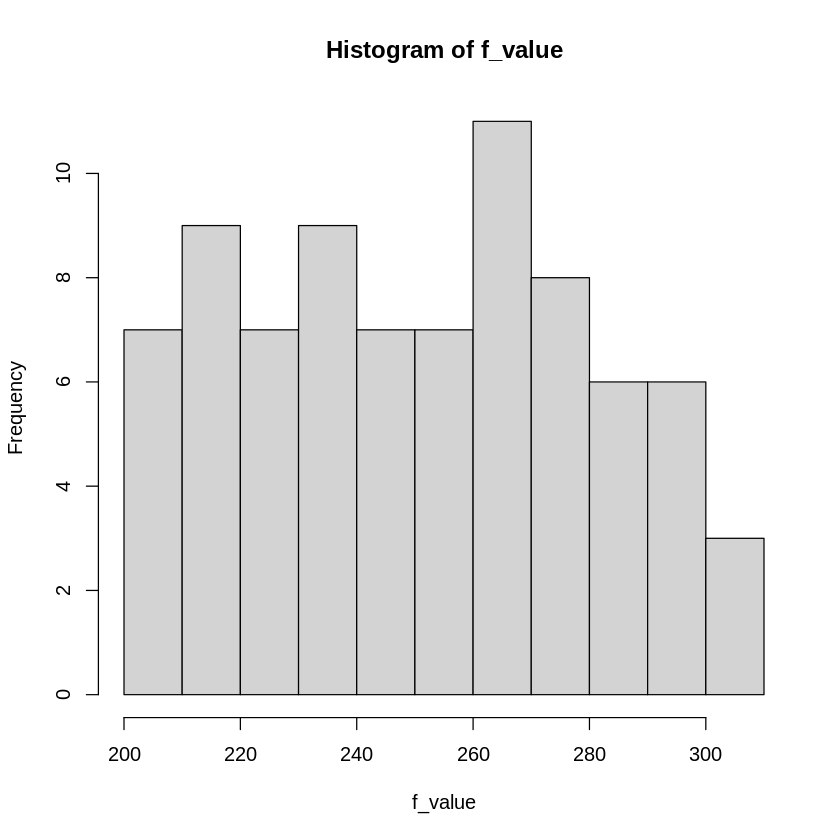

In [97]:
#values from thetahat
thetebias <- 251.671653135 #selected parameter
thetaone <- 0.227168908 # selected parameter
thetatwo <- -0.036521863 # constant value
thetathree <- -0.003650664 # constant value


Epison <- RSS_Model_5 * 2 ## fixing value of eplision
num <- 100 #number of iteration
##Calculating Y-hat for performing rejection ABC
counter <- 0
for (i in 1:num) {
  range1 <- runif(1, thetebias * 0.8, thetebias * 1.2)
  range2 <- runif(1, thetaone * 0.8, thetaone * 1.2)
  New_thetahat <- matrix(c(range1,range2,thetatwo,thetathree))
  New_Y_Hat <- X_model5 %*% New_thetahat ## calculating new Y-hat
  new_RSS <- sum((Y-New_Y_Hat)^2)
  new_RSS
  if (new_RSS > Epison){
    arr_1[i] <- range1
    arr_2[i] <- range2
    counter = counter+1
    f_value <- matrix(arr_1)
    s_value <- matrix(arr_2)
  }
}
hist(f_value)

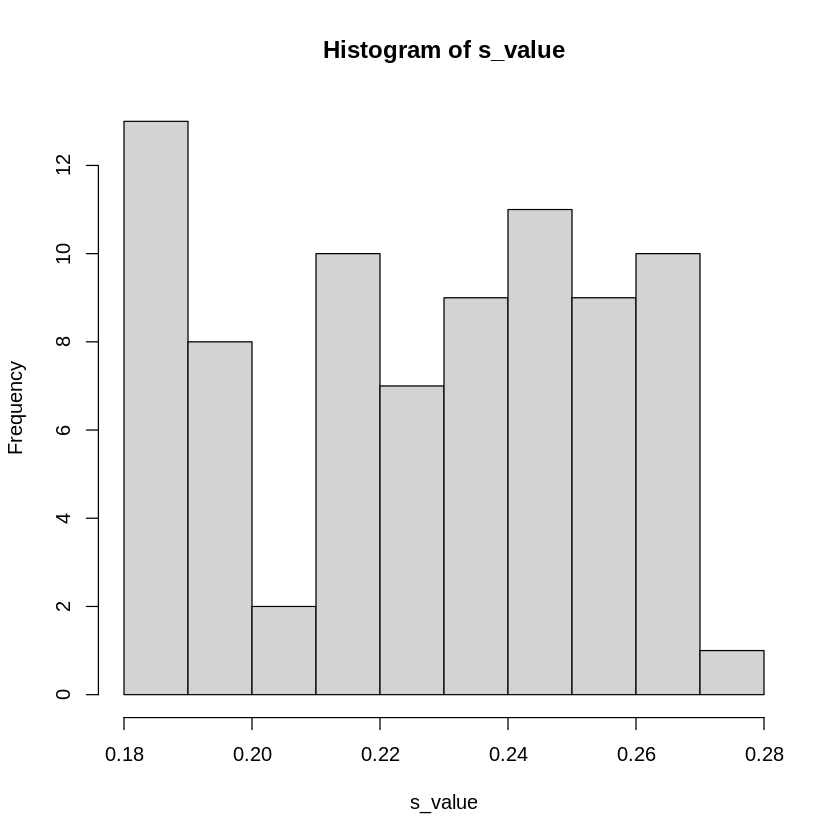

In [98]:
hist(s_value)

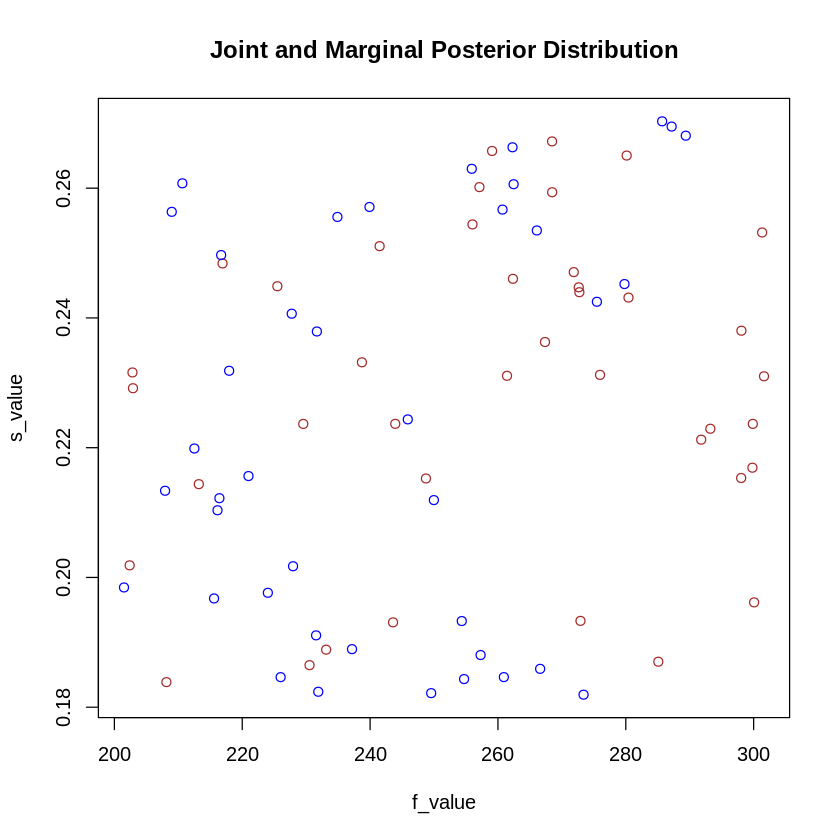

In [99]:
###ploting Joint and Marginal Posterior Distribution of the graph
plot(f_value,s_value, col = c("brown", "blue"), main = "Joint and Marginal Posterior Distribution")